<a href="https://colab.research.google.com/github/manasarthak/Emotion-classification-using-physiological-signal/blob/main/ModelTraining_Valence_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import class_weight,shuffle

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
#importing layers 
from keras.layers import Input,LSTM,BatchNormalization,Dropout,Dense,Activation,concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
dataset=np.load('/content/drive/MyDrive/DEAP/extracted_features/'+'fea.npy',allow_pickle=True);
ArLabels=np.load('/content/drive/MyDrive/DEAP/arousal/'+'all_arousal_labels.npy',allow_pickle=True);
ValLabels=np.load('/content/drive/MyDrive/DEAP/valence/'+'all_valence_labels.npy',allow_pickle=True);

In [5]:
dataset.shape#the initial 5 and ending 5 seconds are removed therefore 6400 datapoints

(1280, 32, 24)

**Channel selection based on classification performance for valence using SVM**

**Channels are:Fp1	AF3 F3 F7 FC5 FC1 C3 T7 CP5 CP1 P3 P7 PO3 O1 Oz Pz Fp2 AF4 Fz F4 F8 FC6 FC2 Cz C4 T8 CP6 CP2 P4 P8 PO4 O2 in order.**

In [6]:
labels=ValLabels;

In [ ]:
print(np.count_nonzero(labels==0))

556


In [ ]:
724/1280.0

0.565625

In [ ]:
def channel_accuracy(data):
  #'Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto
  Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(data,labels,test_size=0.15,random_state=42);
  svc=SVC()
  svc.fit(Xtrain1,Ytrain1)
  Ypred1=svc.predict(Xtest1)
  return(accuracy_score(Ytest1,Ypred1));


In [ ]:
for i in range(32):
  d1=dataset[:,i:i+1,:];
  d1=d1.reshape(1280,6400);
  acc=channel_accuracy(d1);
  print("Channel accuracy of channel no. ",i,"is ",acc);


Channel accuracy of channel no.  0 is  0.578125
Channel accuracy of channel no.  1 is  0.5833333333333334
Channel accuracy of channel no.  2 is  0.5833333333333334
Channel accuracy of channel no.  3 is  0.5833333333333334
Channel accuracy of channel no.  4 is  0.578125
Channel accuracy of channel no.  5 is  0.5729166666666666
Channel accuracy of channel no.  6 is  0.578125
Channel accuracy of channel no.  7 is  0.578125
Channel accuracy of channel no.  8 is  0.578125
Channel accuracy of channel no.  9 is  0.5833333333333334
Channel accuracy of channel no.  10 is  0.578125
Channel accuracy of channel no.  11 is  0.578125
Channel accuracy of channel no.  12 is  0.578125
Channel accuracy of channel no.  13 is  0.5677083333333334
Channel accuracy of channel no.  14 is  0.5729166666666666
Channel accuracy of channel no.  15 is  0.5833333333333334
Channel accuracy of channel no.  16 is  0.578125
Channel accuracy of channel no.  17 is  0.5833333333333334
Channel accuracy of channel no.  18 is

**The 12 channels are thus selected based on their positioning and accuracy are : Fp1,AF3,F3,F7,CP1,Pz,FP2,AF4,FZ,FC6,P4,P04**

In [7]:
   x_train,x_test,y_train,y_test=train_test_split(dataset,labels,test_size=0.05,random_state=6);

   scaler = MinMaxScaler()
   x_train = scaler.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
   x_test = scaler.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
   
   x_train0 = x_train[:, 0, :].reshape(1216,1,24)
   x_train1 = x_train[:, 1, :].reshape(1216,1,24)
   x_train2 = x_train[:, 2, :].reshape(1216,1,24) 
   x_train3 = x_train[:, 3, :].reshape(1216,1,24)
   x_train4 = x_train[:, 7, :].reshape(1216,1,24)
   x_train5 = x_train[:, 8, :].reshape(1216,1,24) 
   x_train6 = x_train[:, 9, :].reshape(1216,1,24)
   x_train7 = x_train[:, 15, :].reshape(1216,1,24)
   x_train8 = x_train[:, 17, :].reshape(1216,1,24) 
   x_train9 = x_train[:, 18, :].reshape(1216,1,24)
   x_train10 = x_train[:, 21, :].reshape(1216,1,24)
   x_train11 = x_train[:, 28, :].reshape(1216,1,24)

   x_test0 = x_test[:, 0, :].reshape(64,1,24)
   x_test1 = x_test[:, 1, :].reshape(64,1,24)
   x_test2 = x_test[:, 2, :].reshape(64,1,24)
   x_test3 = x_test[:, 3, :].reshape(64,1,24)
   x_test4 = x_test[:, 7, :].reshape(64,1,24)
   x_test5 = x_test[:, 8, :].reshape(64,1,24)
   x_test6 = x_test[:, 9, :].reshape(64,1,24)
   x_test7 = x_test[:, 15, :].reshape(64,1,24)
   x_test8 = x_test[:, 17, :].reshape(64,1,24)
   x_test9 = x_test[:, 18, :].reshape(64,1,24)
   x_test10 = x_test[:, 21, :].reshape(64,1,24)
   x_test11 = x_test[:, 28, :].reshape(64,1,24)



In [124]:
lstm_no = 24
dense1 = 24
act1 = 'relu'
act2='relu'
ip1 = 1;
ip2 = 24;
dr=0.2;

In [125]:
    channel1 = Input(shape=(ip1, ip2))
    lstm1 = LSTM(lstm_no,activation=act1)(channel1)
    b1=BatchNormalization()(lstm1)
    drop1=Dropout(dr)(b1)
    x1 = Dense(dense1, activation = act2)(drop1);
    x1=BatchNormalization()(x1)
    x1=Dropout(dr)(x1)

    channel2 = Input(shape=(ip1, ip2))
    lstm2 = LSTM(lstm_no,activation=act1)(channel2)
    b2=BatchNormalization()(lstm2)
    drop2=Dropout(dr)(b2)
    x2 = Dense(dense1, activation = act2)(drop2);
    x2=BatchNormalization()(x2)
    x2=Dropout(dr)(x2)

    channel3 = Input(shape=(ip1, ip2))
    lstm3 = LSTM(lstm_no,activation=act1)(channel3)
    b3=BatchNormalization()(lstm3)
    drop3=Dropout(dr)(b3)
    x3 = Dense(dense1, activation = act2)(drop3);
    x3=BatchNormalization()(x3)
    x3=Dropout(dr)(x3)

    channel4 = Input(shape=(ip1, ip2))
    lstm4 = LSTM(lstm_no,activation=act1)(channel4)
    b4=BatchNormalization()(lstm4)
    drop4=Dropout(dr)(b4)
    x4 = Dense(dense1, activation = act2)(drop4);
    x4=BatchNormalization()(x4)
    x4=Dropout(dr)(x4)

    channel5 = Input(shape=(ip1, ip2))
    lstm5 = LSTM(lstm_no,activation=act1)(channel5)
    b5=BatchNormalization()(lstm5)
    drop5=Dropout(dr)(b5)
    x5 = Dense(dense1, activation = act2)(drop5);
    x5=BatchNormalization()(x5)
    x5=Dropout(dr)(x5)

    channel6 = Input(shape=(ip1, ip2))
    lstm6 = LSTM(lstm_no,activation=act1)(channel6)
    b6=BatchNormalization()(lstm6)
    drop6=Dropout(dr)(b6)
    x6 = Dense(dense1, activation = act2)(drop6);
    x6=BatchNormalization()(x6)
    x6=Dropout(dr)(x6)

    channel7 = Input(shape=(ip1, ip2))
    lstm7 = LSTM(lstm_no,activation=act1)(channel7)
    b7=BatchNormalization()(lstm7)
    drop7=Dropout(dr)(b7)
    x7 = Dense(dense1, activation = act2)(drop7);
    x7=BatchNormalization()(x7)
    x7=Dropout(dr)(x7)

    channel8 = Input(shape=(ip1, ip2))
    lstm8 = LSTM(lstm_no,activation=act1)(channel8)
    b8=BatchNormalization()(lstm8)
    drop8=Dropout(dr)(b8)
    x8 = Dense(dense1, activation = act2)(drop8);
    x8=BatchNormalization()(x8)
    x8=Dropout(dr)(x8)

    channel9 = Input(shape=(ip1, ip2))
    lstm9 = LSTM(lstm_no,activation=act1)(channel9)
    b9=BatchNormalization()(lstm9)
    drop9=Dropout(dr)(b9)
    x9 = Dense(dense1, activation = act2)(drop9);
    x9=BatchNormalization()(x9)
    x9=Dropout(dr)(x9)

    channel10 = Input(shape=(ip1, ip2))
    lstm10 = LSTM(lstm_no,activation=act1)(channel10)
    b10=BatchNormalization()(lstm10)
    drop10=Dropout(dr)(b10)
    x10 = Dense(dense1, activation = act2)(drop10);
    x10=BatchNormalization()(x10)
    x10=Dropout(dr)(x10)

    channel11 = Input(shape=(ip1, ip2))
    lstm11 = LSTM(lstm_no,activation=act1)(channel11)
    b11=BatchNormalization()(lstm11)
    drop11=Dropout(dr)(b11)
    x11 = Dense(dense1, activation = act2)(drop11);
    x11=BatchNormalization()(x11)
    x11=Dropout(dr)(x11)

    channel12 = Input(shape=(ip1, ip2))
    lstm12 = LSTM(lstm_no,activation=act1)(channel12)
    b12=BatchNormalization()(lstm12)
    drop12=Dropout(dr)(b12)
    x12 = Dense(dense1, activation = act2)(drop12);
    x12=BatchNormalization()(x12)
    x12=Dropout(dr)(x12)

    x=concatenate([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12],axis=-1);
    x = Dense(12, activation='relu')(x)
    x=BatchNormalization()(x)
    x=Dropout(0.7)(x)
    x = Dense(12, activation='tanh')(x)
    x=BatchNormalization()(x)
    
    output = Dense(1, activation='sigmoid')(x);

    model=Model([channel1, channel2, channel3, channel4, channel5, channel6, channel7, channel8, channel9, channel10 ,channel11, channel12],
              output);
    opt=keras.optimizers.Adam(learning_rate=0.001);
    model.compile(loss='mse',optimizer=opt,metrics=['accuracy']);

    history=model.fit(x=[x_train0, x_train1, x_train2, x_train3, x_train4, x_train5, x_train6, x_train7, x_train8, x_train9, x_train10,
                      x_train11],y=y_train, epochs=500,batch_size=128,
                    validation_data=([x_test0, x_test1, x_test2, x_test3, x_test4, x_test5, x_test6, x_test7, x_test8, x_test9,
                                      x_test10, x_test11],y_test));
    print("Hightest accuracy: " + str(max(history.history['val_accuracy'])));

Epoch 1/500
10/10 [==============================] - 22s 272ms/step - loss: 0.3278 - accuracy: 0.4852 - val_loss: 0.2503 - val_accuracy: 0.4375
Epoch 2/500
10/10 [==============================] - 0s 18ms/step - loss: 0.2996 - accuracy: 0.5123 - val_loss: 0.2501 - val_accuracy: 0.5312
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 0.2981 - accuracy: 0.5181 - val_loss: 0.2495 - val_accuracy: 0.5469
Epoch 4/500
10/10 [==============================] - 0s 18ms/step - loss: 0.2899 - accuracy: 0.5197 - val_loss: 0.2491 - val_accuracy: 0.5469
Epoch 5/500
10/10 [==============================] - 0s 19ms/step - loss: 0.2892 - accuracy: 0.5140 - val_loss: 0.2488 - val_accuracy: 0.5312
Epoch 6/500
10/10 [==============================] - 0s 19ms/step - loss: 0.2733 - accuracy: 0.5304 - val_loss: 0.2487 - val_accuracy: 0.5312
Epoch 7/500
10/10 [==============================] - 0s 19ms/step - loss: 0.2815 - accuracy: 0.5140 - val_loss: 0.2486 - val_accuracy: 0.5312
Epoc

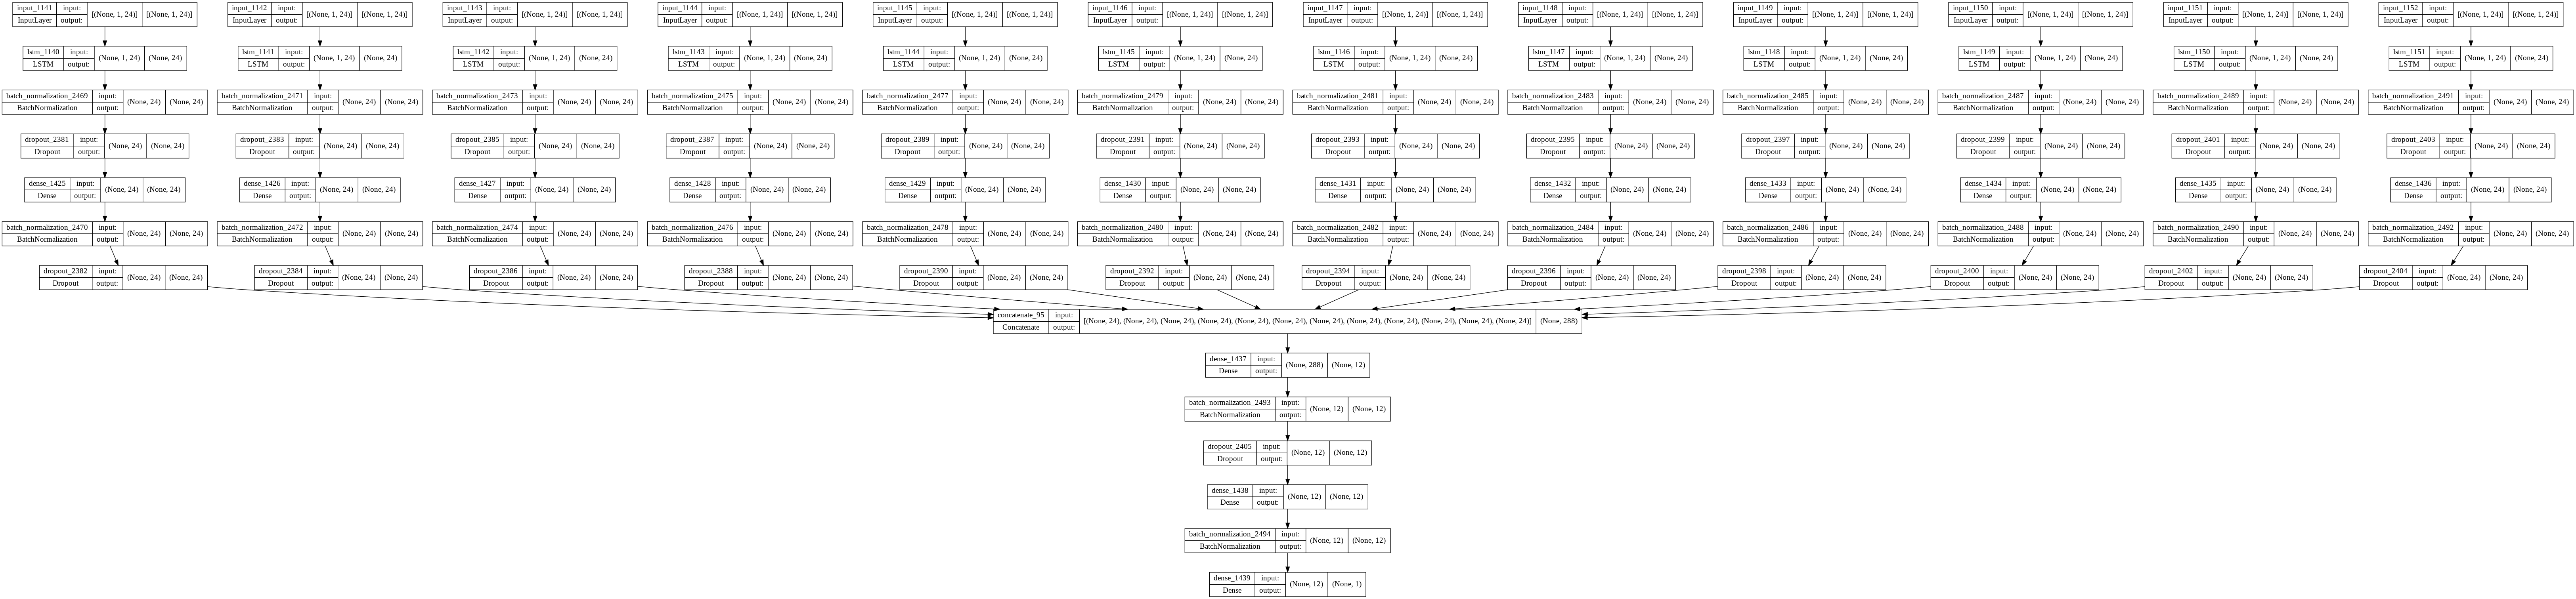

In [128]:
plot_model(model, to_file='model_val_plot.png', show_shapes=True, show_layer_names=True)